# Jobsheet 03 - Naive Bayes

**NIM**: 2041720132

**NAMA**: Maulana Bintang Irfansyah

**KELAS**: TI-3H

# Tugas

## Tugas 1

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data `spam.csv`
2. Fitur `CountVectorizer` dengan mengaktifkan **stop_words**
3. Evaluasi hasilnya

## Tugas 2

Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

1. Menggunakan data `spam.csv`
2. Fitur `TF-IDF` dengan mengaktifkan **stop_words**
3. Evaluasi hasilnya dan bandingkan dengan hasil tugas 1.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data `spam.csv`

** Jawaban Tugas 1 dan Tugas 2**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
data = data.rename(columns = {'v1': 'target','v2': 'text'})

data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Data Distribution')

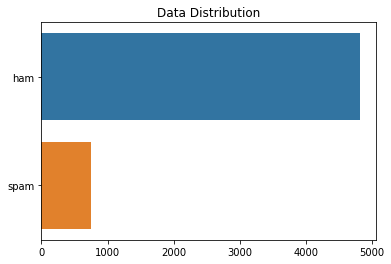

In [8]:
s = data['target'].value_counts()
sns.barplot(x=s.values, y=s.index)
plt.title('Data Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


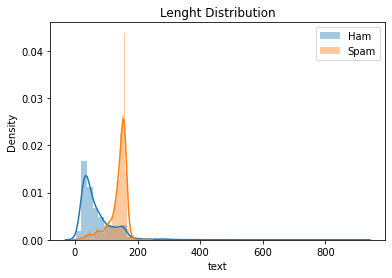

In [13]:
s1 = data[data['target'] == 'ham']['text'].str.len()
sns.distplot(s1, label='Ham')
s2 = data[data['target'] == 'spam']['text'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Lenght Distribution')
plt.legend()

In [14]:
print(s1.mean(), s2.mean())

71.02362694300518 138.8661311914324


**Count Vectorizer**





In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 7354
Longest word: com1win150ppmx3age16subscription


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

In [29]:
# Mendapatkan nama fitur untuk array
feature_names = np.array(vect.get_feature_names())

# Mengurutkan koefisien dari model
sorted_coef_index = model.coef_[0].argsort()

# Menemukan 10 koefisien terkecil dan 10 terbesar
# 10 koefisien terbesar sedang diindeks menggunakan [:-11:-1]
# jadi daftar yang dikembalikan diurutkan dari terbesar ke terkecil
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['kaiez' 'needy' 'needs' 'needing' 'needed' 'needa' 'ned' 'necklace'
 'neck' 'necessity']

Largest Coefs: 
['to' 'call' 'you' 'your' 'free' 'for' 'the' 'now' 'or' 'txt']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [30]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(vect.transform(X_test))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 99.21%


**TF IDF**


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=3).fit(X_train)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 2295
Longest word: tscs087147403231winawk


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

In [33]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['ûò' 'hell' 'height' 'hee' 'heavy' 'shower' 'showing' 'head' 'hella' 'he']

Largest Coefs: 
['to' 'call' 'free' 'your' 'txt' 'you' 'or' 'for' 'now' 'stop']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [34]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(vect.transform(X_test))
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Accuracy: 98.35%


**Kesimpulan**
Menurut saya, lebih baik menggunakan metode CountVectorizer karena hasil Accuracy: 99.21%
